# Content:
1. [Goodness of a fit: Error metrics](#1.-Goodness-of-a-fit:-Error-metrics)    
1.1 [Mean absolute error and standard deviation](##1.1-Mean-absolute-error-and-standard-deviation)    
1.2 [Pearson correlation coefficient and scatterplot](##-1.2-Pearson-correlation-coefficient-and-scatterplot)    
2. [Weighted least squares ](#2.-Weighted-least-squares)
3. [Multiple least squares: Higher dimensional fit ](#3.-Multiple-least-squares:-Higher-dimensional-fit)

# 1. Goodness of a fit: Error metrics 

Today, we will learn about how to load data (i.e., x and y values) from a file, line-by-line and then perform least squares fitting. In the following exercise, we are going to fit the data to a cubic polynomial. 

In [18]:
import numpy as np

#=== Read the data from a file
myfile=open('../data/fit_01.csv','r')

x=np.array([])
y=np.array([])

iline=0
for line in myfile:
    if iline > 0:            # i == 0 corresponds to the heading
        str=line.split(',')  # csv, comma separated values
        valx=eval(str[0])
        valy=eval(str[1])
        x=np.append(x,[valx])
        y=np.append(y,[valy])
        
    iline=iline+1
myfile.close() 
    
#=== Let's use numpy's polyval and polyfit 

D=3
N=x.shape[0]

print('#    i','     a_i')
a=np.polyfit(x,y,D)
for i in range(D+1):
    print('{:6d}{:15.8f}'.format(i,a[i]))

p = np.poly1d(a)
print("\nThe fitted polynomial is \n",p,"\n\n")

yfit=np.polyval(a,x)

err=y-yfit
abs_err = np.abs(y-yfit)
perc_err=np.abs( abs_err/y ) *100

print('#    i','     x_i           y_i             y_i (fit)      error          |error|      % error')
for i in range(N):
    print('{:6d}{:15.8f}{:15.8f}{:15.8f}{:15.8f}{:15.8f}{:15.8f}'.format(i,x[i],y[i],yfit[i],err[i],abs_err[i],perc_err[i]))

#    i      a_i
     0    -0.36808270
     1     1.63518064
     2     4.23907769
     3     3.68735902

The fitted polynomial is 
          3         2
-0.3681 x + 1.635 x + 4.239 x + 3.687 


#    i      x_i           y_i             y_i (fit)      error          |error|      % error
     0     0.23000000     5.64000000     4.74436948     0.89563052     0.89563052    15.87997369
     1     1.01000000     7.83000000     9.25763929    -1.42763929     1.42763929    18.23294107
     2     2.29000000    17.04000000    17.54959667    -0.50959667     0.50959667     2.99059077
     3     2.87000000    21.38000000    20.62089216     0.75910784     0.75910784     3.55055116
     4     4.15000000    24.56000000    23.13331744     1.42668256     1.42668256     5.80896808
     5     5.36000000    16.21000000    16.70560536    -0.49560536     0.49560536     3.05740504
     6     5.51000000    14.57000000    15.11452357    -0.54452357     0.54452357     3.73729287
     7     6.36000000     0.780000

Now let's plot the actual data against the fitted function.

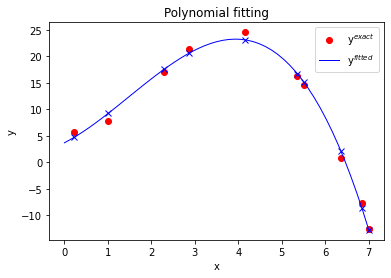

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(x,y,'o',color='r',linewidth=1,label='y$^{exact}$')
plt.plot(x,yfit,'x',color='b',linewidth=1)

xgrids=np.linspace(0,7, 51)
ygridsfit=np.polyval(a,xgrids)

plt.plot(xgrids,ygridsfit,'-',color='b',linewidth=1,label='y$^{fitted}$')

plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.title('Polynomial fitting')

#plt.savefig('test.png')  

#=== display
plt.show()

## 1.1 Mean absolute error and standard deviation

Let's do a bit of statistics on the fitted polynomial and see if we have done a good job. The simplest error metrics to look at are 



Mean absolute error:
$$
{\rm Mean\,absolute\,error} = \langle | {\bf y}-{\bf y}^{\rm fitted} | \rangle=\frac{\sum_k | y_k-y_k^{\rm fitted}|}{N}
$$

Standard deviation:
To define standard deviation, we have to centralize the deviation, i.e., the mean of the error must be zero. So, let's define the mean error as 
$$
{\rm Mean\,error} = \mu = \langle {\bf y}-{\bf y}^{\rm fitted}\rangle=\frac{\sum_k \left( y_k-y_k^{\rm fitted}\right)}{N}
$$
$$
{\rm Standard\,deviation} = \sqrt{ \langle ( {\bf y}-{\bf y}^{\rm fitted}-\mu )^2 \rangle} =\sqrt{\frac{\sum_k ( y_k-y_k^{\rm fitted}-\mu)^2}{N}}
$$

In [11]:
print('No. of data points, N: ', N)
print('Degree of the polynomial, D: ', D)

#Mean absolute error
mae=np.mean(abs_err)
print("Mean absolute error: ", mae)

# Centralized error
cerr=err-np.mean(err)

# Variance
var=np.mean(cerr**2)

# Standard deviation
std=np.sqrt(var)
print("Standard deviation:  ", std)

# Numpy's standard deviation
std=np.std(err)
print("Standard deviation using numpy: ", std)

No. of data points, N:  10
Degree of the polynomial, D:  3
Mean absolute error:  0.8589813516277054
Standard deviation:   0.947836379168307
Standard deviation using numpy:  0.947836379168307


Here is a new concept which we will discuss without a lot of digression. The standard deviation reported above should be thought of as a lower bound. This is because the formula used for standard deviation does not consider the degree of the polynomial. The general idea is that if we use a polynomial with a higher degree (a more flexible function), we should expect a larger standard deviation. Hence, when using polynomial regression, in the denominator of mean, we will use $N-D-1$ instead of $N$. This error will now provide a safe upper bound. 
$$
{\rm Standard\,deviation\,with\,penalty\,(for\,polynomials)} = \sqrt{ \langle ( {\bf y}-{\bf y}^{\rm fitted}-\mu )^2 \rangle} =\sqrt{\frac{\sum_k ( y_k-y_k^{\rm fitted}-\mu)^2}{N-D-1}}
$$

In [12]:
var=np.sum(cerr**2)/(N-D-1.0)
std=np.sqrt(var)
print("Standard deviation of polynomial fit [upper bound]: ", std)

Standard deviation of polynomial fit [upper bound]:  1.2236515038161304


It is usually a good practice to include the error metrics in the plot.

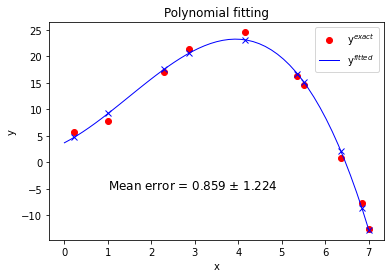

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(x,y,'o',color='r',linewidth=1,label='y$^{exact}$')
plt.plot(x,yfit,'x',color='b',linewidth=1)

xgrids=np.linspace(0,7, 51)
ygridsfit=np.polyval(a,xgrids)

plt.text(1,-5, r'Mean error = {0:5.3f}'.format(mae)+' $\pm$ {0:5.3f}'.format(std), fontsize=12)

plt.plot(xgrids,ygridsfit,'-',color='b',linewidth=1,label='y$^{fitted}$')

plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.title('Polynomial fitting')

#plt.savefig('test.png')  

#=== display
plt.show()

## 1.2 Pearson correlation coefficient and scatterplot

Another important error metric is the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) which quantifies the linear correlation between two sets of data. This can be calculated using the numpy's function `corrcoef`.

In [6]:
my_rho = np.corrcoef(y, yfit)[0,1]  #check what is [0,1]
print('Pearson correlation coefficient is: ', my_rho)

Pearson correlation coefficient is:  0.9966984011626987


In a scatterplot (which must always be a square plot), one plots the actual y against the fitted-y. Here, it is easy to spot the deviation from the $y=x$ line. The correlation coefficient calculated above maybe provided in a scatterplot as an additional information.

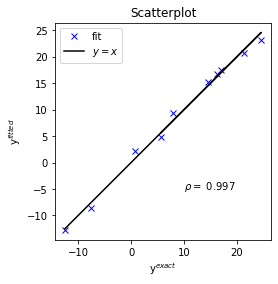

In [7]:
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()                          # comment if square plot is not needed
ax = fig.add_subplot(111)                   # comment if square plot is not needed
plt.plot(y,yfit,'x',color='blue')
ax.set_aspect('equal', adjustable='box')    # comment if square plot is not needed
plt.plot(y,y,'-',color='black')

plt.text(10,-5, r'$\rho=$ {0:5.3f}'.format(my_rho), fontsize=10)

plt.legend(['fit','$y=x$'])

plt.xlabel("y$^{exact}$")
plt.ylabel("y$^{fitted}$")
plt.title('Scatterplot')

#plt.savefig('test.png')  

#=== display
plt.show()

---
Homework-10: Use the data given in '../data/fit_01.csv' and perform least-squares regression using polynomials of degrees $D=1, 2, 3, ..., 8$. For each case, calculate the standard deviation for the polynomial fit. Comment on the polynomial which gives the lowest standard deviation.

---

Homework-11: Kepler's third law states that the period of a planet's orbit, $P$, and its semimajor axis, $a$, have the relation 
$$
P^2 = a^3
$$
Here is some data that can be used to check this law. 

```
Planet     P [years]       a [AU]    
Mercury    0.242           0.388      
Venus      0.616           0.724    
Earth      1.000           1.000    
Mars       1.881           1.524     
Jupiter   11.86            5.200    
Saturn    29.33            9.510    
```
Using least-squares regression, fit the data to the equation $P=a^n$ by first taking the logarithm ${\rm ln}(P)=n{\rm ln}(a)$. Discuss your results and comment on the accuracy of the fit.

## 2. Weighted least squares 

![board%20work%20-25.jpg](../boardwork/board%20work%20-25.jpg)
![board%20work%20-26.jpg](../boardwork/board%20work%20-26.jpg)

---
Homework-12: Use the data given in 'data/fit_02.csv' and perform weighted least-squares regression using a polynomials of degrees $D=3$. Column three of the file contains the standard deviation of each measured value of 'y'.

---

## 3. Multiple least squares: Higher dimensional fit 

![board%20work%20-27.jpg](../boardwork/board%20work%20-27.jpg)